In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
pos_sentiment=0
neg_sentiment=0

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\klsai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
dataset = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [30]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

In [31]:
X_data=dataset['Review']
Y_data=dataset['Liked']

In [32]:
#Pre Processing the Data 
def pre_processing(X):
    sentiment_data =[]
    for review in X:
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        stops = stopwords.words('english')
        stops.remove('not')
        review = [ps.stem(word) for word in review if not word in stops]
        review = ' '.join(review)
        sentiment_data.append(review)
    return sentiment_data

In [33]:
sentimentdata=pre_processing(X_data)
#print(sentimentdata)

In [34]:
cv = CountVectorizer()
X_data = cv.fit_transform(sentimentdata).toarray()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data, test_size = 0.1, random_state = 0)

In [36]:
#Using the Naive Bayes Model for Classifying the Data
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [70]:
rev=[]

class Sentiment:
    pos_sentiment=0
    neg_sentiment=0

def review_classifier(review,pos_sentiment,neg_sentiment):
    data_review = [review]
    new_Xtest = cv.transform(data_review).toarray()
    new_ypred = classifier.predict(new_Xtest)
    #print("\nReview: ", review)
    if(new_ypred==0):
        #print("Negative Review")
        rev.append("Negative Review")
        Sentiment.pos_sentiment=Sentiment.pos_sentiment+1
    else:
        #print("Positive Review")
        rev.append("Positive Review")
        Sentiment.neg_sentiment=Sentiment.neg_sentiment+1
        
for i in range(1000):
    review_classifier(sentimentdata[i],pos_sentiment,neg_sentiment)
    
dataset['Sentiment']=rev
dataset.head()

,Review,Liked,Sentiment
0,Wow... Loved this place.,1,Positive Review
1,Crust is not good.,0,Negative Review
2,Not tasty and the texture was just nasty.,0,Negative Review
3,Stopped by during the late May bank holiday of...,1,Positive Review
4,The selection on the menu was great and so wer...,1,Positive Review


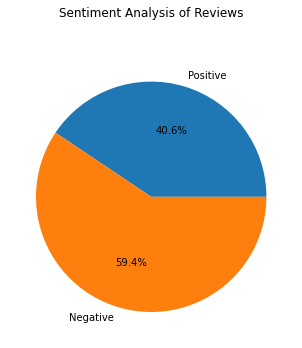

In [68]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
sentiment_types=['Positive','Negative']
sentiment_count=[Sentiment.pos_sentiment,Sentiment.neg_sentiment]
plt.title("Sentiment Analysis of Reviews\n\n")
ax.pie(sentiment_count,labels=sentiment_types,autopct='%1.1f%%')
plt.show()

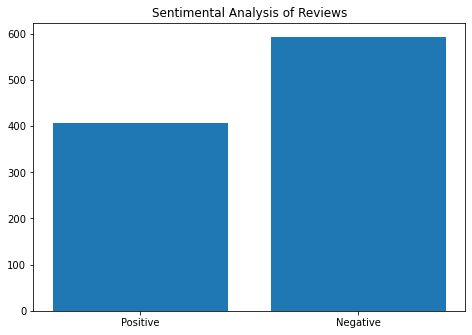

In [69]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
sentiment_types=['Positive','Negative']
sentiment_count=[Sentiment.pos_sentiment,Sentiment.neg_sentiment]
plt.title("Sentimental Analysis of Reviews")
ax.bar(sentiment_types,sentiment_count)
plt.show()

In [63]:
#Calculating the Accuracy of the Test Dataset
y_pred_data = classifier.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred_data)
print("Confusion Matrix:\n", c_matrix)
print("Accuracy of the test dataset: ", accuracy_score(y_test, y_pred_data)*100)

Confusion Matrix:
 [[27 24]
 [ 3 46]]
Accuracy of the test dataset:  73.0
